In [1]:
import pandas as pd

df = pd.read_csv("./DSI_kickstarterscrape_dataset.csv", encoding='cp437') #load data
df.head() #show some of them

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [2]:
df.describe() #just to show some details about the data

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [3]:
df.info #more details

<bound method DataFrame.info of        project id                                               name  \
0           39409                              WHILE THE TREES SLEEP   
1          126581               Educational Online Trading Card Game   
2          138119                                              STRUM   
3          237090  GETTING OVER - One son's search to finally kno...   
4          246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   
...           ...                                                ...   
45952  2147336747                                  The Dance Project   
45953  2147346811  new album from J-Sw!ft The Adventures of Negro...   
45954  2147367534                                      ELIZABETH REX   
45955  2147369705                     Dragon Keepers IV Book Project   
45956  2147460119                                 Moments of Insight   

                                                     url      category  \
0      http://www.kickstarter

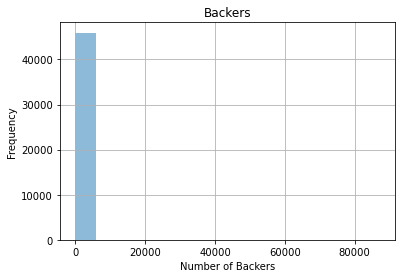

87.47397431084505


In [35]:
#histogram for number of backers
# These are the standard imports that we will use all the time.
import os                             # Library to do things on the filesystem
import matplotlib.pyplot as plt       # Standard plotting library
import numpy as np                    # General purpose math library
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats           # Scipy again
df['backers'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Number of Backers")
plt.title("Backers")
plt.show()
skewValue = df['backers'].skew() #calculate skew value
print(skewValue)

Doesn't look great, there are some outliers with extreme values. 75% of the projects have 59 or less backers.

<AxesSubplot:ylabel='Frequency'>

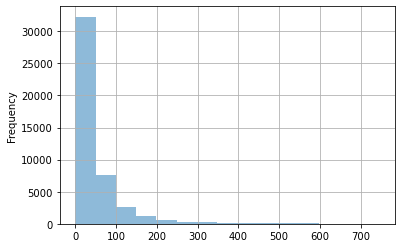

In [37]:
filtered=df[(df["backers"]<750)] #a great majority of the projects have less than 750 backers, remove those that are more than 750
filtered['backers'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None) #histogram with outliers removed

<AxesSubplot:>

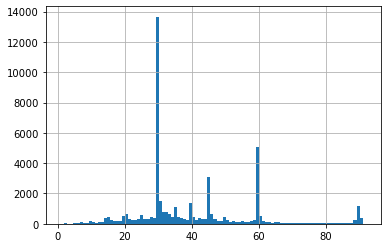

In [31]:
df['duration'].hist(bins=100) #it isn't always a good idea for high bins, however it sometimes gives clearer picture

<AxesSubplot:>

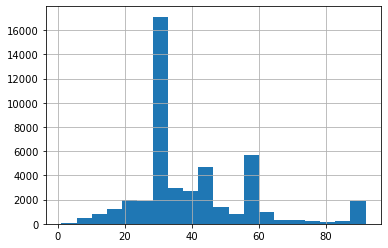

In [32]:
df['duration'].hist(bins=20) #it's still roughly the same shape. This just shows that the data don't follow gaussian curve

<AxesSubplot:ylabel='status'>

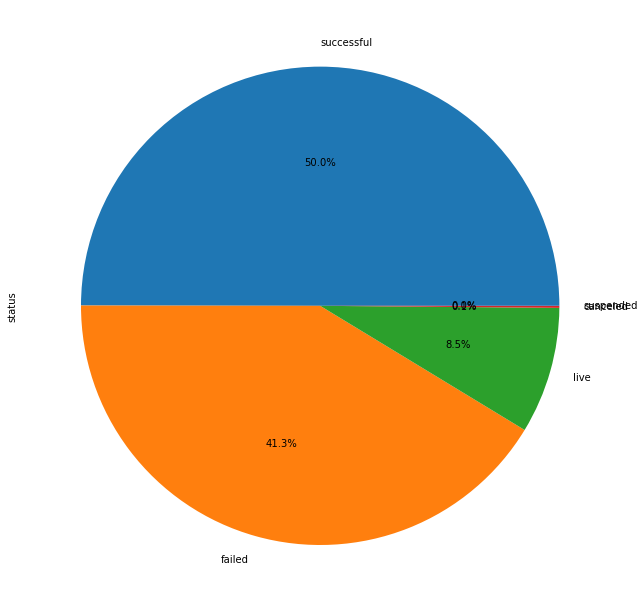

In [38]:
#let's draw a pie chart about success rate
df.status.value_counts().plot.pie(figsize=(11, 11), autopct='%1.1f%%')

In [164]:
def return_week_bins(val):
    return math.ceil(val)

In [114]:
def return_days_bins(val):
    return math.ceil(val)

In [116]:
import math
successful_state_series = df[df['status'] == "successful"]['duration']
successful_state_df = successful_state_series.map(return_days_bins).value_counts().rename_axis('duration').reset_index(name='success counts')
total_state_df = df['duration'].map(return_days_bins).value_counts().rename_axis('duration').reset_index(name='total counts')

In [117]:
success_rate_duration = pd.merge(successful_state_df, total_state_df, on='duration')
success_rate_duration

,duration,success counts,total counts
0,30,6035,12969
1,60,1396,4219
2,31,1331,2264
3,45,1121,2659
4,32,696,1152
...,...,...,...
87,84,13,44
88,4,8,14
89,3,6,13
90,92,4,15


In [120]:
success_rate_duration ['success rate in %'] = success_rate_duration ['success counts']/success_rate_duration ['total counts']*100
success_rate_duration.sort_values(by=['duration'])

,duration,success counts,total counts,success rate in %
91,1,4,5,80.000000
86,2,13,19,68.421053
89,3,6,13,46.153846
88,4,8,14,57.142857
80,5,19,36,52.777778
...,...,...,...,...
75,88,22,64,34.375000
56,89,54,129,41.860465
9,90,459,1144,40.122378
29,91,185,539,34.322820


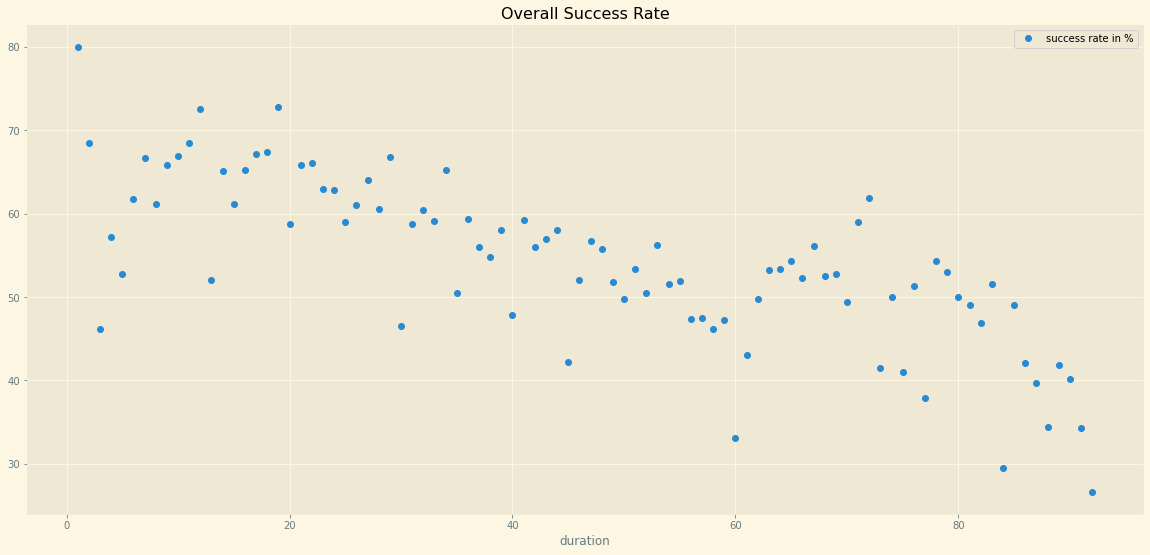

In [152]:
plt.rcParams["figure.figsize"] = [20,9]
plt.style.use('Solarize_Light2')
success_rate_duration.plot(x='duration', y='success rate in %', style='o');
plt.title('Overall Success Rate');

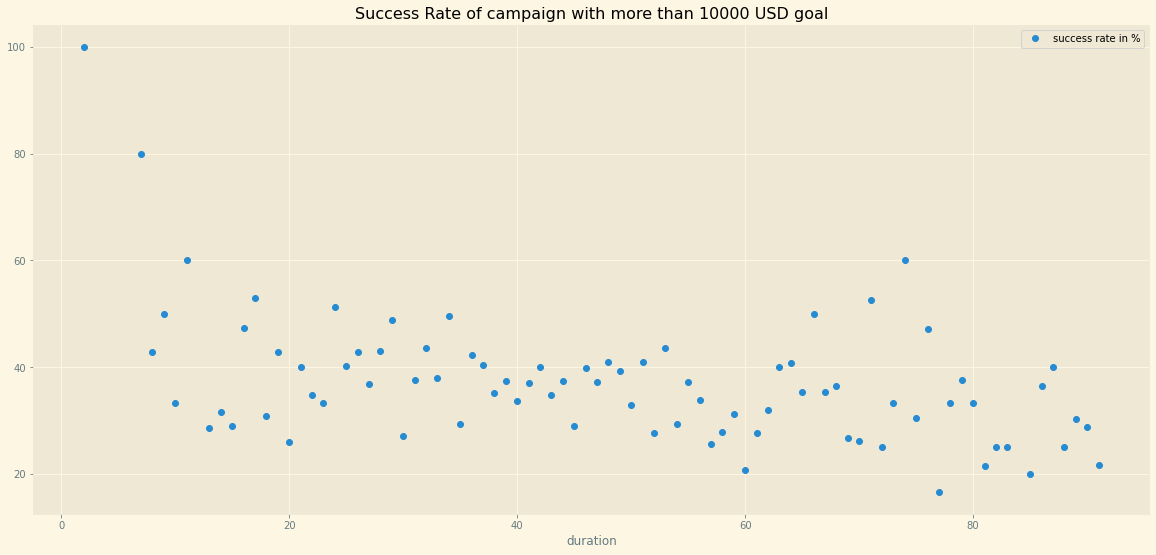

In [167]:
high_target = df[df['goal'] >= 10000]
successful_state_series_high = high_target[high_target['status'] == "successful"]['duration']
successful_state_high_df = successful_state_series_high.map(return_days_bins).value_counts().rename_axis('duration').reset_index(name='success counts')
total_state_high_df = high_target['duration'].map(return_days_bins).value_counts().rename_axis('duration').reset_index(name='total counts')
success_rate_duration_high = pd.merge(successful_state_high_df, total_state_high_df, on='duration')
success_rate_duration_high ['success rate in %'] = success_rate_duration_high['success counts']/success_rate_duration_high['total counts']*100
success_rate_duration_high.sort_values(by=['duration'])
success_rate_duration_high.plot(x='duration', y='success rate in %', style='o');
plt.title('Success Rate of campaign with more than 10000 USD goal');

In [168]:
success_rate_duration_high.sort_values(by=['duration'])

,duration,success counts,total counts,success rate in %
82,2,1,1,100.000000
63,7,4,5,80.000000
71,8,3,7,42.857143
81,9,2,4,50.000000
75,10,3,9,33.333333
...,...,...,...,...
65,87,4,10,40.000000
69,88,3,12,25.000000
49,89,10,33,30.303030
8,90,103,359,28.690808


In [169]:
high_target.sort_values(by=['duration'])

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
16028,756751971,The Chris Knox Benefit Concert,http://www.kickstarter.com/projects/badabing/t...,Music,Music,"New York, NY",successful,37500.0,40555.0,1.081467,403,"Thu, 01 Apr 2010 16:00:00 -0000",2,"$75,$150",7,62,2.00
35901,1688740826,Page Cancelled Due to Ending Time Error,http://www.kickstarter.com/projects/750438295/...,Film &amp; Video,Documentary,"Los Angeles, CA",failed,30000.0,0.0,0.000000,0,"Sun, 12 Feb 2012 02:00:00 -0000",9,"$1,$20,$50,$100,$250,$500,$1,000,$5,000,$10,000",0,1,2.40
18155,856864534,Everlasting Love...A Family Emerges Through th...,http://www.kickstarter.com/projects/30584253/e...,Publishing,Nonfiction,"El Paso, TX",failed,15000.0,0.0,0.000000,0,"Wed, 08 Feb 2012 03:00:00 -0000",2,"$20,$30",0,0,4.36
16232,766563382,Music Video for &quot;Maybe I Was Wrong&quot;,http://www.kickstarter.com/projects/374312986/...,Film &amp; Video,Film &amp; Video,"San Diego, CA",failed,10000.0,0.0,0.000000,0,"Sat, 01 Jan 2011 23:00:00 -0000",8,"$15,$100,$150,$250,$350,$500,$1,000,$2,000",0,0,4.98
12645,600230712,Cafe Donaris - A Military-Retired Family's Dream,http://www.kickstarter.com/projects/donaris/ca...,Food,Food,"Sanford, FL",failed,40000.0,0.0,0.000000,0,"Tue, 01 Nov 2011 16:14:16 -0000",6,"$1,$50,$100,$250,$500,$1,000",0,0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28629,1345326140,"Men Who Dance With Men, Photographic Documentary",http://www.kickstarter.com/projects/1221125203...,Photography,Photography,"New York, NY",failed,12000.0,3805.0,0.317083,66,"Sun, 03 Apr 2011 01:40:00 -0000",3,"$10,$20,$900",10,3,91.48
29329,1378129953,SmoothnFusion Jazz Comedy Album,http://www.kickstarter.com/projects/425875083/...,Music,Jazz,"New York, NY",failed,12500.0,146.0,0.011680,3,"Thu, 31 Mar 2011 22:53:47 -0000",7,"$10,$25,$50,$100,$500,$1,000,$5,000",0,0,91.96
6007,282190697,'Do What You Love' Live your Dreams - a P. J...,http://www.kickstarter.com/projects/pjgalati/d...,Film &amp; Video,Documentary,"New York, NY",failed,12977.0,0.0,0.000000,0,"Mon, 04 Apr 2011 05:16:22 -0000",13,"$1,$5,$10,$15,$20,$25,$35,$45,$55,$100,$500,$1...",0,0,91.96
13118,623776234,once upon a mountain,http://www.kickstarter.com/projects/251318632/...,Film &amp; Video,Documentary,"Stanley, ID",failed,20000.0,1530.0,0.076500,4,"Mon, 04 Apr 2011 00:35:59 -0000",9,"$5,$10,$20,$50,$100,$500,$1,000,$5,000,$10,000",0,0,91.96


In general, the shorter the campaign the higher the success rate. Caution need to be taken for higher amount because we have less data. The highest point itself is an outlier.

In [175]:
def return_goal_bins(val):
    if val < 5000:
        return "< 5000"
    elif val < 10000:
        return "5000-10000"
    elif val < 15000:
        return "10000-15000"
    elif val < 20000:
        return "15000-20000"
    elif val < 25000:
        return "20000-25000"
    elif val < 30000:
        return "25000-30000"
    else:
        return "30000+"

successful_state_series = df[df['status'] == "successful"]['goal']
successful_state_goal_df = successful_state_series.map(return_goal_bins).value_counts().rename_axis('goal').reset_index(name='success counts')
total_state_goal_df = df['goal'].map(return_goal_bins).value_counts().rename_axis('goal').reset_index(name='total counts')
success_rate_goal = pd.merge(successful_state_goal_df, total_state_goal_df, on='goal')
success_rate_goal ['success rate in %'] = success_rate_goal ['success counts']/success_rate_goal ['total counts']*100
success_rate_goal.sort_values(by=['goal'])
success_rate_goal

,goal,success counts,total counts,success rate in %
0,< 5000,14781,24398,60.582835
1,5000-10000,4680,10105,46.313706
2,10000-15000,1712,4275,40.046784
3,15000-20000,681,1986,34.290030
4,30000+,435,2741,15.870120
5,20000-25000,425,1486,28.600269
6,25000-30000,255,966,26.397516


Campaign with less than 5000 USD goal have high success rate. We would look more in depth below.

In [178]:
def return_goal_bins(val):
    if val < 500:
        return "< 500"
    elif val < 1000:
        return "500-1000"
    elif val < 1500:
        return "1000-1500"
    elif val < 2000:
        return "1500-2000"
    elif val < 2500:
        return "2000-2500"
    elif val < 3000:
        return "2500-3000"
    elif val < 3500:
        return "3000-3500"
    elif val < 4000:
        return "3500-4000"
    elif val < 4500:
        return "4000-4500"
    elif val < 5000:
        return "4500-5000"
    else:
        return "5000+"

successful_state_series = df[df['status'] == "successful"]['goal']
successful_state_goal_df = successful_state_series.map(return_goal_bins).value_counts().rename_axis('goal').reset_index(name='success counts')
total_state_goal_df = df['goal'].map(return_goal_bins).value_counts().rename_axis('goal').reset_index(name='total counts')
success_rate_goal = pd.merge(successful_state_goal_df, total_state_goal_df, on='goal')
success_rate_goal ['success rate in %'] = success_rate_goal ['success counts']/success_rate_goal ['total counts']*100
success_rate_goal.sort_values(by=['success rate in %'])
success_rate_goal

,goal,success counts,total counts,success rate in %
0,5000+,8188,21559,37.979498
1,500-1000,2420,3645,66.392318
2,1000-1500,2290,3712,61.691810
3,2000-2500,1966,3223,60.999069
4,3000-3500,1780,3110,57.234727
5,1500-2000,1577,2547,61.915980
6,2500-3000,1529,2620,58.358779
7,< 500,1189,1731,68.688619
8,4000-4500,892,1620,55.061728
9,3500-4000,828,1571,52.705283


Campaign with less than 1000 USD goal has 2/3 success rate, while less than 2500 USD has 60% rate.

In [179]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
main_colors = dict({'failed': 'rgb(200,50,50)', 'successful': 'rgb(50,200,50)'})
data = []
annotations = []

rate_success_cat = df[df['status'] == 'successful'].groupby(['category']).count()['project id']\
                / df.groupby(['category']).count()['project id'] * 100
rate_failed_cat = df[df['status'] == 'failed'].groupby(['category']).count()['project id']\
                / df.groupby(['category']).count()['project id'] * 100
    
rate_success_cat = rate_success_cat.sort_values(ascending=False)
rate_failed_cat = rate_failed_cat.sort_values(ascending=True)

bar_success = go.Bar(
        x=rate_success_cat.index,
        y=rate_success_cat,
        name='successful',
        marker=dict(
            color=main_colors['successful'],
            line=dict(
                color='rgb(100,100,100)',
                width=1,
            )
        ),
    )

bar_failed = go.Bar(
        x=rate_failed_cat.index,
        y=rate_failed_cat,
        name='failed',
        marker=dict(
            color=main_colors['failed'],
            line=dict(
                color='rgb(100,100,100)',
                width=1,
            )
        ),
    )

data = [bar_success, bar_failed]
layout = go.Layout(
    barmode='stack',
    title='% of successful and failed projects by main category',
    autosize=False,
    width=800,
    height=400,
    annotations=annotations
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='main_cat')

# Time Series

In [180]:
from datetime import datetime
df["funded date"]

0        Fri, 19 Aug 2011 19:28:17 -0000
1        Mon, 02 Aug 2010 03:59:00 -0000
2        Fri, 08 Jun 2012 00:00:31 -0000
3        Sun, 08 Apr 2012 02:14:00 -0000
4        Wed, 01 Jun 2011 15:25:39 -0000
                      ...               
45952    Fri, 30 Mar 2012 13:57:00 -0000
45953    Sun, 22 Apr 2012 02:12:10 -0000
45954    Mon, 16 Jan 2012 05:00:00 -0000
45955    Sat, 19 May 2012 19:44:47 -0000
45956    Thu, 04 Aug 2011 04:30:00 -0000
Name: funded date, Length: 45957, dtype: object

In [236]:
df['east'] = pd.to_datetime(df["funded date"]) - pd.to_timedelta(df['duration'], unit = 'D') #get campaign start time
df['east'] = df['east'].dt.tz_convert('US/Eastern') #convert to eastern time
df.east

0       2011-07-20 15:28:17-04:00
1       2010-06-15 19:39:48-04:00
2       2012-05-10 20:00:31-04:00
3       2012-03-06 15:57:12-05:00
4       2011-05-02 11:25:39-04:00
                   ...           
45952   2012-02-21 13:01:48-05:00
45953   2012-02-21 22:09:46-05:00
45954   2011-12-19 16:19:12-05:00
45955   2012-04-19 15:44:47-04:00
45956   2011-06-24 15:22:48-04:00
Name: east, Length: 45957, dtype: datetime64[ns, US/Eastern]

In [237]:
df['Date'] = pd.to_datetime(df.east.dt.date) #get starting date in Eastern time

In [238]:
df

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,levels,reward levels,updates,comments,duration,east,Date,Hour,Day,Month
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,2011-07-20 15:28:17-04:00,2011-07-20,1970-01-01 00:00:00.000000015,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000008
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,5,"$1,$5,$10,$25,$50",6,0,47.18,2010-06-15 19:39:48-04:00,2010-06-15,1970-01-01 00:00:00.000000023,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,...,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,2012-05-10 20:00:31-04:00,2012-05-10,1970-01-01 00:00:00.000000020,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000006
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,2012-03-06 15:57:12-05:00,2012-03-06,1970-01-01 00:00:00.000000022,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000004
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,6,"$10,$25,$50,$100,$150,$250",2,0,30.00,2011-05-02 11:25:39-04:00,2011-05-02,1970-01-01 00:00:00.000000011,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45952,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.0,1.202000,...,3,"$20,$50,$100",2,0,37.83,2012-02-21 13:01:48-05:00,2012-02-21,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000003
45953,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.007500,...,14,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,...",1,1,59.96,2012-02-21 22:09:46-05:00,2012-02-21,1970-01-01 00:00:00.000000022,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000004
45954,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,1.000000,...,4,"$10,$25,$100,$500",2,0,27.32,2011-12-19 16:19:12-05:00,2011-12-19,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001
45955,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,0.085695,...,7,"$15,$16,$19,$29,$29,$39,$75",17,0,30.00,2012-04-19 15:44:47-04:00,2012-04-19,1970-01-01 00:00:00.000000015,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000005


In [239]:
successful_state_df = df[df['status'] == "successful"]
df_success_month = successful_state_df.groupby(successful_state_df["east"].dt.month).size().rename_axis('month of the year').reset_index(name='success counts')
df_total_month = df.groupby(df["east"].dt.month).size().rename_axis('month of the year').reset_index(name='total counts')
success_rate_month = pd.merge(df_success_month, df_total_month, on='month of the year')
success_rate_month ['success rate in %'] = success_rate_month ['success counts']/success_rate_month ['total counts']*100

Text(0, 0.5, 'success rate in %')

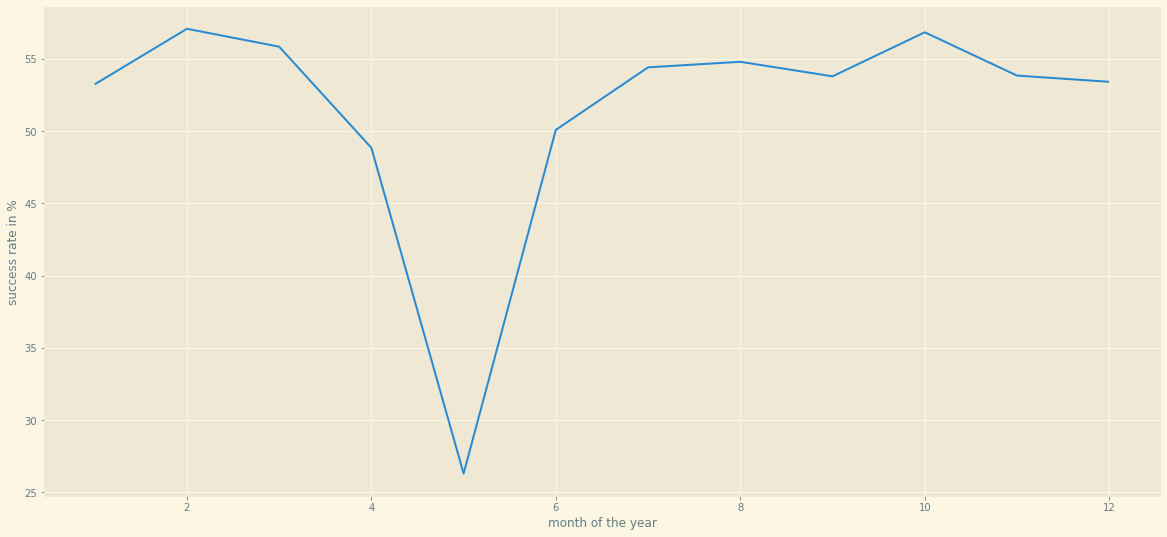

In [240]:
plt.plot(success_rate_month['month of the year'], success_rate_month['success rate in %'])
plt.xlabel("month of the year");  # custom x label using matplotlib
plt.ylabel("success rate in %")

In [241]:
df_success_day = successful_state_df.groupby(successful_state_df["east"].dt.dayofweek).size().rename_axis('day of the week').reset_index(name='success counts')
df_total_day = df.groupby(df["east"].dt.dayofweek).size().rename_axis('day of the week').reset_index(name='total counts')
success_rate_day = pd.merge(df_success_day, df_total_day, on='day of the week')
success_rate_day ['success rate in %'] = success_rate_day ['success counts']/success_rate_day ['total counts']*100

Text(0, 0.5, 'success rate in %')

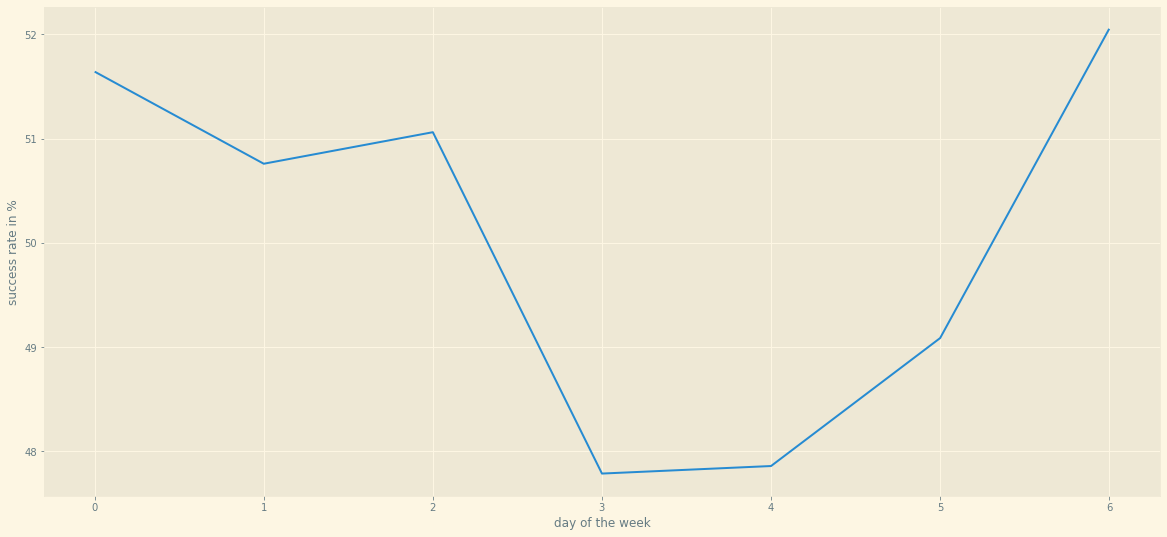

In [242]:
plt.plot(success_rate_day['day of the week'], success_rate_day['success rate in %'])
plt.xlabel("day of the week");  # custom x label using matplotlib
plt.ylabel("success rate in %")

In [246]:
df_success_hour = successful_state_df.groupby(successful_state_df["east"].dt.hour).size().rename_axis('hour of the day').reset_index(name='success counts')
df_total_hour = df.groupby(df["east"].dt.hour).size().rename_axis('hour of the day').reset_index(name='total counts')
success_rate_hour = pd.merge(df_success_hour, df_total_hour, on='hour of the day')
success_rate_hour ['success rate in %'] = success_rate_hour ['success counts']/success_rate_hour ['total counts']*100

Text(0, 0.5, 'success rate in %')

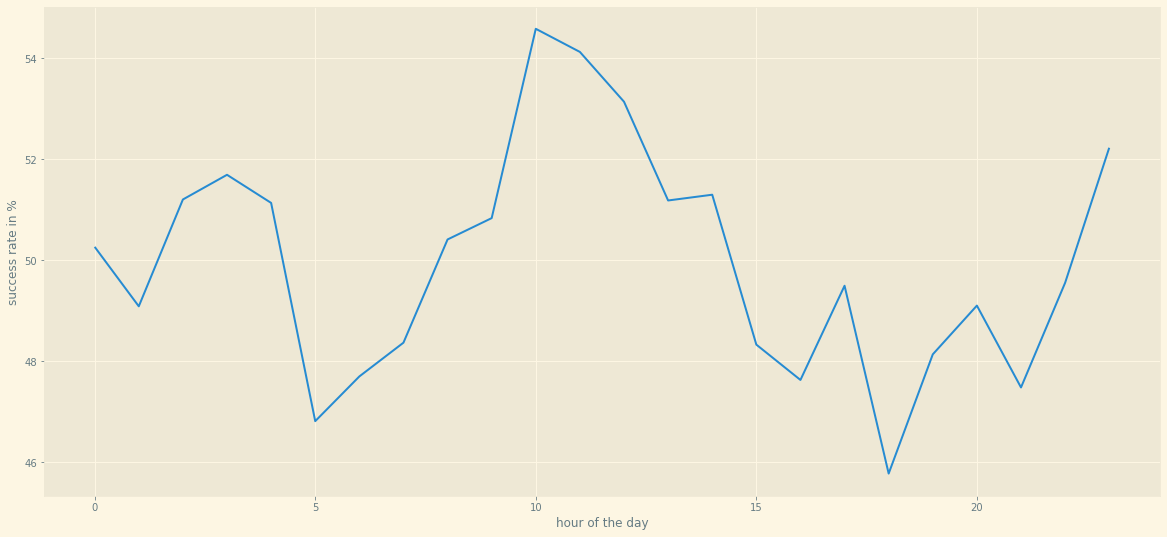

In [247]:
plt.plot(success_rate_hour['hour of the day'], success_rate_hour['success rate in %'])
plt.xlabel("hour of the day");  # custom x label using matplotlib
plt.ylabel("success rate in %")

The most successful month is February, closely followed by October.